In [4]:
import pandas as pd
import matplotlib.pyplot as plt                            
import seaborn as sns                                     
import numpy as np

In [3]:
df = pd.read_csv('comparacion_prueba.csv')

In [5]:
FITNESS_OBJETIVO = 171.918929          # Valor objetivo

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 [Text(0, 0.0001, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$')])

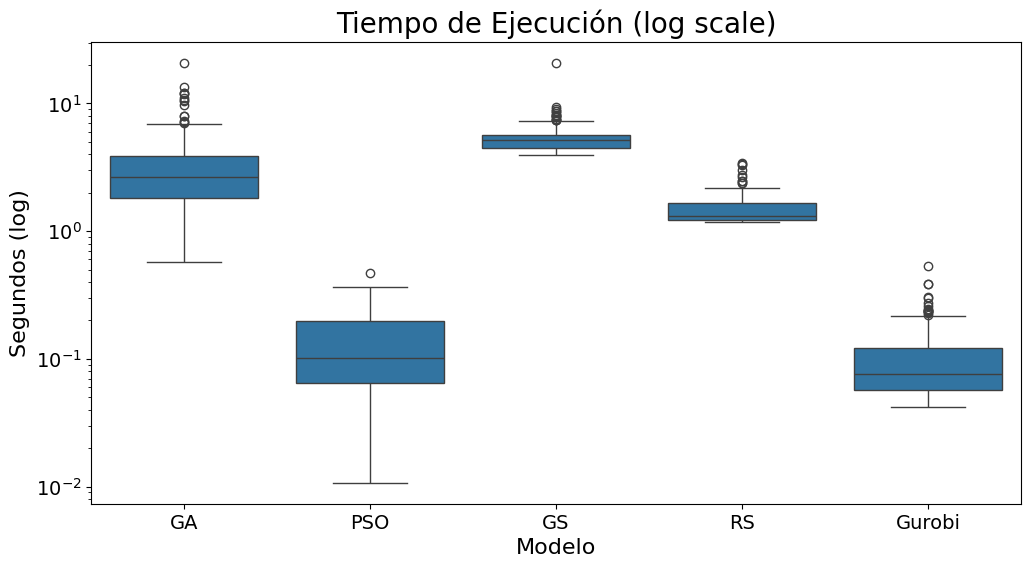

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Modelo', y='tiempo_ejecucion')
plt.yscale('log')
plt.title("Tiempo de Ejecución (log scale)", fontsize = 20)
plt.ylabel("Segundos (log)", fontsize = 16)
plt.xlabel("Modelo", fontsize = 16)
plt.xticks(fontsize=14)  # Tamaño de las etiquetas en el eje X
plt.yticks(fontsize=14)  # Tamaño de las etiquetas en el eje Y

(0.0, 1.0)

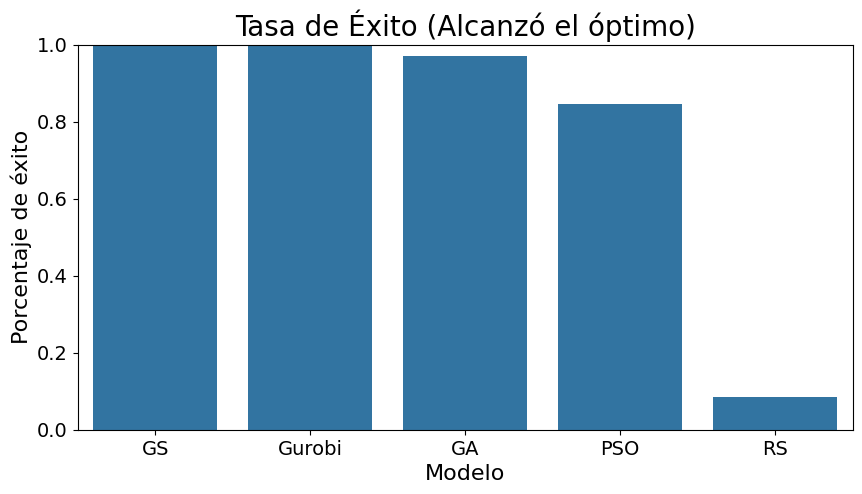

In [49]:
success_rates = df.groupby('Modelo')['alcanzo_optimo'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=success_rates.index, y=success_rates.values)
plt.title("Tasa de Éxito (Alcanzó el óptimo)", fontsize = 20)
plt.ylabel("Porcentaje de éxito", fontsize = 16)
plt.xlabel("Modelo", fontsize = 16)
plt.xticks(fontsize=14)  # Tamaño de las etiquetas en el eje X
plt.yticks(fontsize=14)  # Tamaño de las etiquetas en el eje Y
plt.ylim(0,1)

Text(0, 0.5, 'Fitness')

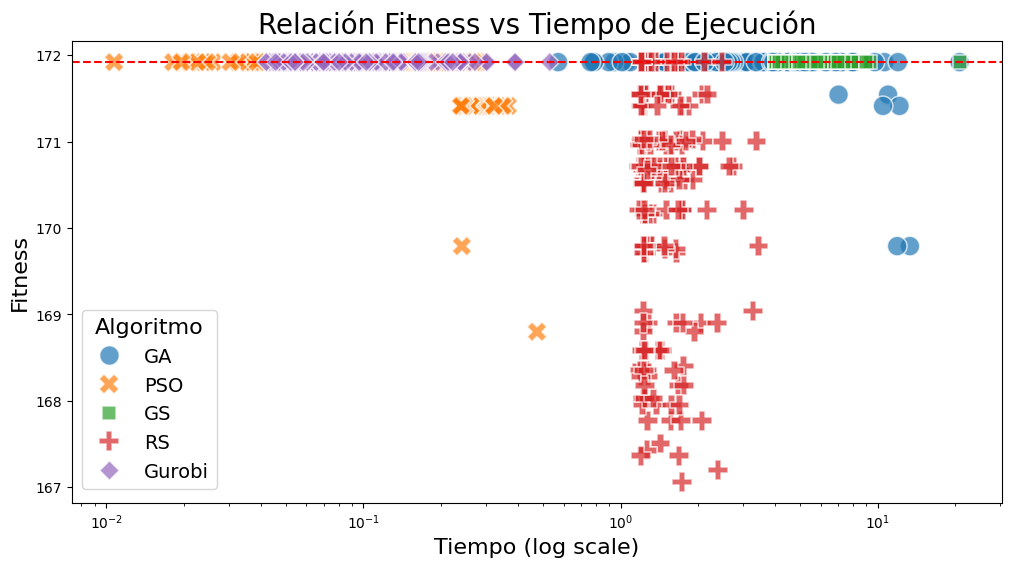

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='tiempo_ejecucion', y='mejor_fitness', 
                hue='Modelo', style='Modelo', s=200, alpha=0.7)

# Personalizar la leyenda
plt.legend(title='Algoritmo', title_fontsize='16', fontsize='14', 
            bbox_to_anchor=(0, 0.01), loc='lower left')
plt.axhline(FITNESS_OBJETIVO, color='r', linestyle='--')
plt.xscale('log')
plt.title("Relación Fitness vs Tiempo de Ejecución", fontsize=20)
plt.xlabel("Tiempo (log scale)", fontsize=16)
plt.ylabel("Fitness", fontsize=16)

In [14]:
stats_table = df.groupby('Modelo').agg({
    'mejor_fitness': ['mean', 'std', 'min', 'max'],
    'tiempo_ejecucion': ['mean', 'std', 'median'],
    'alcanzo_optimo': 'mean'
}).round(2)

# Renombrar columnas
stats_table.columns = ['Fitness (Media)', 'Fitness (Desv)', 'Fitness (Min)', 'Fitness (Max)',
                      'Tiempo (Media)', 'Tiempo (Desv)', 'Tiempo (Mediana)',
                      'Tasa Éxito']
stats_table

,Fitness (Media),Fitness (Desv),Fitness (Min),Fitness (Max),Tiempo (Media),Tiempo (Desv),Tiempo (Mediana),Tasa Éxito
Modelo,,,,,,,,
GA,171.89,0.22,169.79,171.92,3.30,2.52,2.66,0.97
GS,171.92,0.00,171.92,171.92,5.39,1.54,5.13,1.00
Gurobi,171.92,0.00,171.92,171.92,0.10,0.07,0.08,1.00
PSO,171.82,0.31,168.80,171.92,0.13,0.09,0.10,0.84
RS,170.26,1.27,167.06,171.92,1.50,0.40,1.33,0.09


In [15]:
comparison_table = pd.DataFrame({
    'Mejor Fitness Promedio': df.groupby('Modelo')['mejor_fitness'].max(),
    'Tiempo Promedio (s)': df.groupby('Modelo')['tiempo_ejecucion'].mean(),
    'Consistencia (Std Fitness)': df.groupby('Modelo')['mejor_fitness'].std(),
    '% Alcanzó Óptimo': df.groupby('Modelo')['alcanzo_optimo'].mean()*100
}).sort_values(by=['% Alcanzó Óptimo', 'Mejor Fitness Promedio'], ascending=False)

comparison_table

,Mejor Fitness Promedio,Tiempo Promedio (s),Consistencia (Std Fitness),% Alcanzó Óptimo
Modelo,,,,
Gurobi,171.918929,0.101931,0.000000,100.000000
GS,171.918929,5.386746,0.000000,100.000000
GA,171.918929,3.297383,0.220642,97.000000
PSO,171.918929,0.130631,0.314966,84.500000
RS,171.918929,1.495366,1.273573,8.542714
